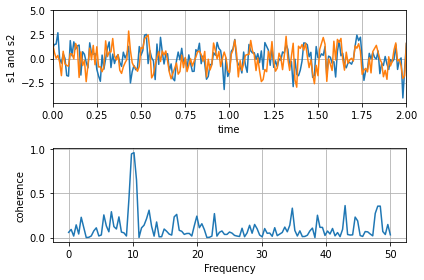

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

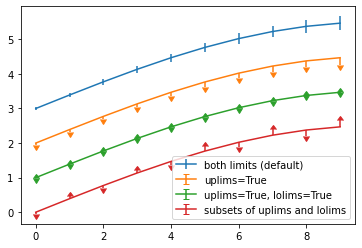

In [2]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

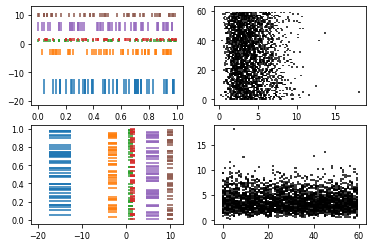

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = ['C{}'.format(i) for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.show()

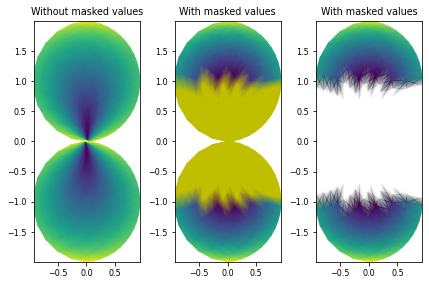

In [4]:
from matplotlib import pyplot as plt
import numpy as np

n = 12
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n * 2)
X, Y = np.meshgrid(x, y)
Qx = np.cos(Y) - np.cos(X)
Qz = np.sin(Y) + np.sin(X)
Z = np.sqrt(X**2 + Y**2) / 5
Z = (Z - Z.min()) / (Z.max() - Z.min())

# The color array can include masked values.
Zm = np.ma.masked_where(np.abs(Qz) < 0.5 * np.max(Qz), Z)

fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].pcolormesh(Qx, Qz, Z, shading='gouraud')
axs[0].set_title('Without masked values')

# You can control the color of the masked region.
cmap = plt.colormaps[plt.rcParams['image.cmap']].with_extremes(bad='y')
axs[1].pcolormesh(Qx, Qz, Zm, shading='gouraud', cmap=cmap)
axs[1].set_title('With masked values')

# Or use the default, which is transparent.
axs[2].pcolormesh(Qx, Qz, Zm, shading='gouraud')
axs[2].set_title('With masked values')

fig.tight_layout()
plt.show()